In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('insurance.csv')

print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [3]:
data.isnull().values.any()

False

In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis

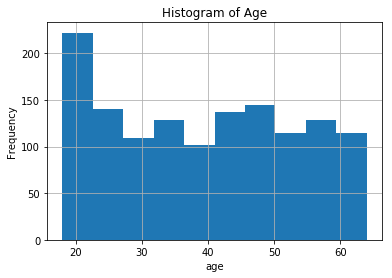

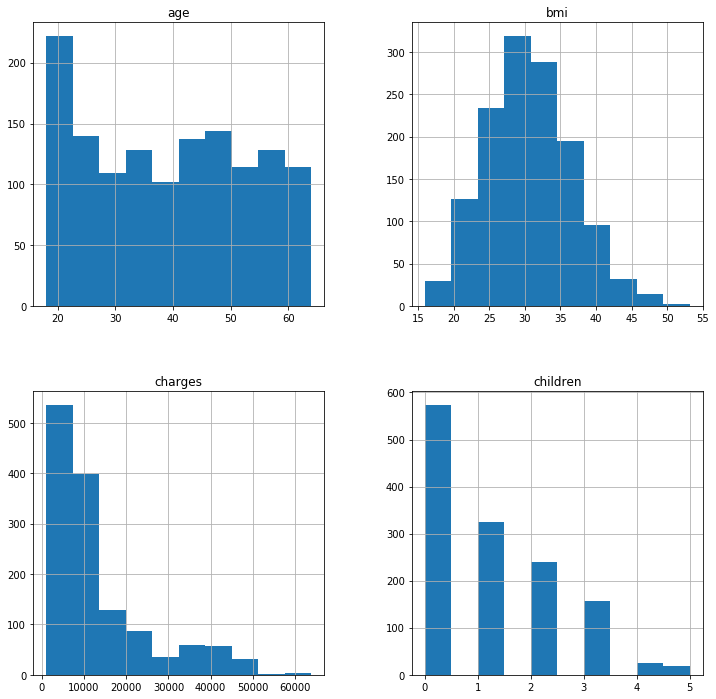

In [6]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns

data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('age')
plt.ylabel('Frequency')


# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

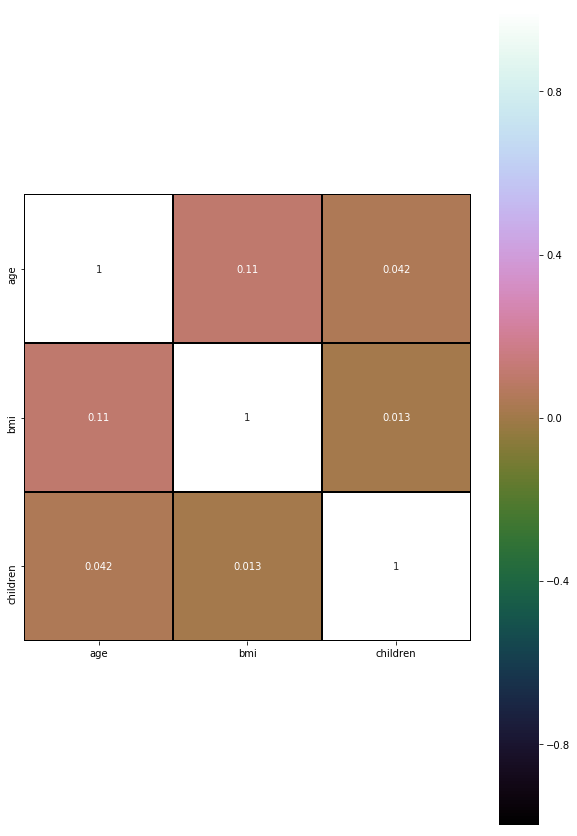

In [8]:
#correlation matrix
import matplotlib.pyplot as plt
%matplotlib inline
data_corr = data.drop(['charges'], axis = 1)
fig=plt.gcf()
fig.set_size_inches(10,15)
fig=sns.heatmap(data_corr.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',
                square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

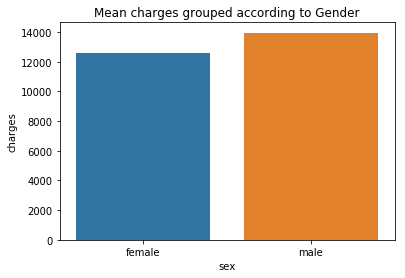

In [9]:
grouping = data.groupby('sex')
data_mean = grouping['charges'].mean().reset_index()
sns.barplot(x='sex', y='charges', data=data_mean)
plt.title('Mean charges grouped according to Gender');

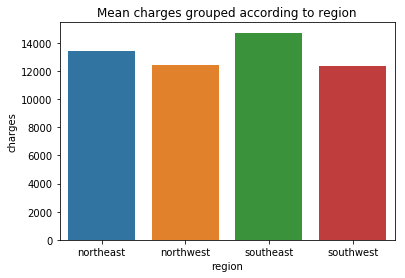

In [10]:
grouping1 = data.groupby('region')
data_mean = grouping1['charges'].mean().reset_index()
sns.barplot(x='region', y='charges', data=data_mean)
plt.title('Mean charges grouped according to region');

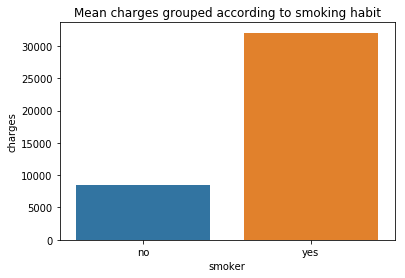

In [11]:
grouping2 = data.groupby('smoker')
data_mean = grouping2['charges'].mean().reset_index()
sns.barplot(x='smoker', y='charges', data=data_mean)
plt.title('Mean charges grouped according to smoking habit');

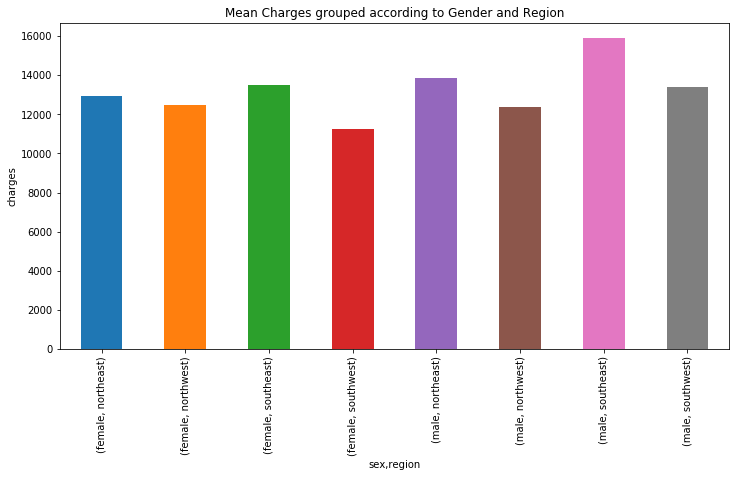

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
data.groupby(['sex','region']).mean()['charges'].plot(ax=ax, kind='bar')
plt.ylabel('charges')
plt.title('Mean Charges grouped according to Gender and Region');

## Box Plots

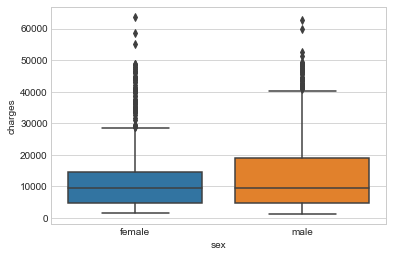

In [13]:
def plot_box(Incomes, col, col_y = 'charges'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=data)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box('charges', 'sex')  

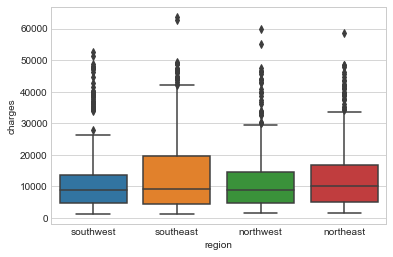

In [14]:
def plot_box(Incomes, col, col_y = 'charges'):
    sns.set_style("whitegrid")
    sns.boxplot(col, col_y, data=data)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel(col_y)# Set text for y axis
    plt.show()
    
plot_box('charges', 'region')  

## let's create dummy variables for the categorical features

In [15]:
a = pd.get_dummies(data['sex'], prefix = "sex")
b = pd.get_dummies(data['smoker'], prefix = "smoker")
c = pd.get_dummies(data['region'], prefix = "region")
frames = [data, a, b, c]
df = pd.concat(frames, axis = 1)

df.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [16]:
df = df.drop(columns = ['sex', 'smoker', 'region'])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
charges             1338 non-null float64
sex_female          1338 non-null uint8
sex_male            1338 non-null uint8
smoker_no           1338 non-null uint8
smoker_yes          1338 non-null uint8
region_northeast    1338 non-null uint8
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.3 KB


In [18]:
y = df.charges.values
x = df.drop(['charges'], axis = 1)

## Splitting of data into test and training set

In [19]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (1070, 11)
Training Labels Shape: (1070,)
Testing Features Shape: (268, 11)
Testing Labels Shape: (268,)


In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# The coefficients
print('Coefficients: \n', regression_model.coef_)

Coefficients: 
 [ 3.40645695e+03  2.22299799e+03  5.00143107e+02 -1.15456792e+15
 -1.15456792e+15  6.34766434e+14  6.34766434e+14 -1.39759299e+16
 -1.40865569e+16 -1.45453095e+16 -1.41046778e+16]


In [23]:
coeffecients = pd.DataFrame(regression_model.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,3.406457e+03
bmi,2.222998e+03
children,5.001431e+02
sex_female,-1.154568e+15
sex_male,-1.154568e+15
smoker_no,6.347664e+14
smoker_yes,6.347664e+14
region_northeast,-1.397593e+16
region_northwest,-1.408656e+16
region_southeast,-1.454531e+16


In [24]:
for idx, col_name in enumerate(x.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for age is 3406.4569491427087
The coefficient for bmi is 2222.9979853586447
The coefficient for children is 500.14310668332087
The coefficient for sex_female is -1154567923041233.5
The coefficient for sex_male is -1154567923041180.0
The coefficient for smoker_no is 634766434144683.1
The coefficient for smoker_yes is 634766434154340.1
The coefficient for region_northeast is -1.397592987714014e+16
The coefficient for region_northwest is -1.4086556901287122e+16
The coefficient for region_southeast is -1.4545309480604504e+16
The coefficient for region_southwest is -1.4104677788652978e+16


In [25]:
#intercept = regression_model.intercept_[0]
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 13381.752827455379


# Linear Regression Model Predictions

In [28]:
predictions = regression_model.predict( x_test)

Text(0,0.5,'Predicted Y')

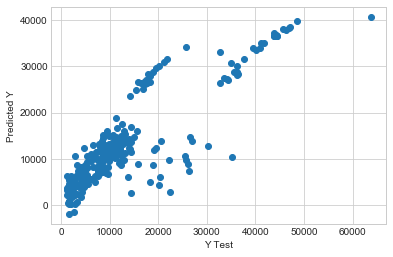

In [29]:
plt.scatter(y_test,predictions)
#plt.plot(y_test, predictions, color = 'blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Linear regression model evaluation

In [26]:
regression_model.score(x_test, y_test)

0.7610640482763265

In [27]:
from sklearn.metrics import mean_squared_error

y_pred_l = regression_model.predict(x_test)
linear_mse = mean_squared_error(y_pred_l, y_test)
linear_rmse = np.sqrt(linear_mse)
print('Linear Regression MSE: %.4f' % linear_mse)
print('Linear Regression RMSE: %.4f' % linear_rmse)

Linear Regression MSE: 33716370.0172
Linear Regression RMSE: 5806.5799


In [30]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4035.2936131446604
MSE: 33716370.01715508
RMSE: 5806.579889845233


# Residuals

C:\Users\maria\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


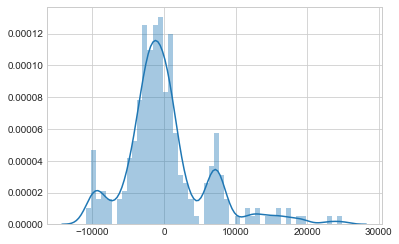

In [31]:
sns.distplot((y_test-predictions),bins=50);

In [32]:
# Predictions on training and testing sets
pred_train = regression_model.predict(x_train)
pred_test = regression_model.predict(x_test)

Text(0.5,1,'Residual Plots')

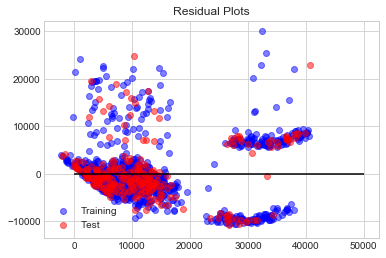

In [33]:
# Scatter plot the training data
train = plt.scatter(pred_train,(y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50000)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

# Decision Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor

decision_model = DecisionTreeRegressor(max_depth=5)
decision_model.fit(x_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Text(0,0.5,'Predicted Y')

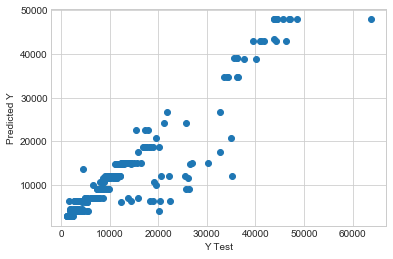

In [35]:
y_pred = decision_model.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [36]:
decision_model.score(x_test, y_test)
print('Decision Tree R squared": %.4f' % decision_model.score(x_test, y_test))

Decision Tree R squared": 0.8613


In [37]:
y_pred_d = decision_model.predict(x_test)
decision_mse = mean_squared_error(y_pred_d, y_test)
decision_rmse = np.sqrt(decision_mse)    
print('Decision Tree MSE: %.4f' % decision_mse)
print('Decision Tree RMSE: %.4f' % decision_rmse)

Decision Tree MSE: 19576350.7041
Decision Tree RMSE: 4424.5170


# Random Forest Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(max_depth=5, random_state=1, n_estimators=100)
RF_model.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [39]:
print('Random Forest R squared": %.4f' % RF_model.score(x_test, y_test))

Random Forest R squared": 0.8638


In [40]:
y_pred_r = RF_model.predict(x_test)
forest_mse = mean_squared_error(y_pred_r, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest MSE: %.4f' % forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest MSE: 19212700.3406
Random Forest RMSE: 4383.2294


Text(0,0.5,'Predicted Y')

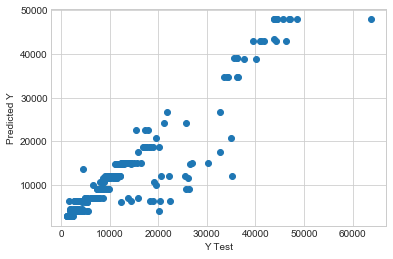

In [41]:
y_pred2 = decision_model.predict(x_test)

plt.scatter(y_test, y_pred2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#  Gradient Boosting Regression

In [42]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
xgb_model = ensemble.GradientBoostingRegressor(max_depth = 3, n_estimators=100)
xgb_model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [43]:
print('Gradient Boosting R squared": %.4f' % xgb_model.score(x_test, y_test))

Gradient Boosting R squared": 0.8636


In [44]:
y_pred_x = xgb_model.predict(x_test)
xgb_model_mse = mean_squared_error(y_pred_x, y_test)
xgb_model_rmse = np.sqrt(xgb_model_mse)
print('Gradient Boosting MSE: %.4f' % xgb_model_mse)
print('Gradient Boosting RMSE: %.4f' % xgb_model_rmse)

Gradient Boosting MSE: 19243176.1739
Gradient Boosting RMSE: 4386.7045


# feature Importance: ho to find feature importace for different models.

In [ ]:
>>> print(regr.feature_importances_)
[0.18146984 0.81473937 0.00145312 0.00233767]
>>> print(regr.predict([[0, 0, 0, 0]]))
[-8.32987858]

In [47]:
print(xgb_model.feature_importances_)

[0.16906779 0.45124163 0.08923659 0.0021398  0.00685821 0.08213248
 0.12178241 0.03192634 0.02290403 0.00898362 0.01372709]


In [ ]:
print(.predict([[0, 0, 0, 0]]))

In [110]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [113]:
feature_labels = np.array(['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'])
importance = xgb_model.feature_importances_


feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))
    

sex_female-0.22%
sex_male-0.68%
region_southeast-0.90%
region_southwest-1.37%
region_northwest-2.29%
region_northeast-3.19%
children-8.17%
smoker_no-8.42%
smoker_yes-11.97%
age-18.07%
bmi-44.71%


In [ ]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os

In [ ]:
cs = MinMaxScaler()
	trainContinuous = cs.fit_transform(train[continuous])
	testContinuous = cs.transform(test[continuous])